# **Temperature Analysis & Visualization**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [41]:
# Lode data

df_temp = pd.read_csv('/content/temperature.csv')
df_bin_size = pd.read_csv('/content/BinSize.csv')

In [42]:
df_temp

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [43]:
df_temp ['Date'] = pd.to_datetime(df_temp ['Date'], errors='coerce')


In [44]:
df_temp_filtered = df_temp [(df_temp ['Date'].dt.year >= 2005) & (df_temp ['Date'].dt.year <= 2014)]
df_temp_filtered.loc[:, 'day_of_year'] = df_temp_filtered['Date'].dt.dayofyear

<ipython-input-44-5afc8ba9c782>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_filtered.loc[:, 'day_of_year'] = df_temp_filtered['Date'].dt.dayofyear


In [45]:
record_highs = df_temp_filtered[df_temp_filtered['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = df_temp_filtered[df_temp_filtered['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()

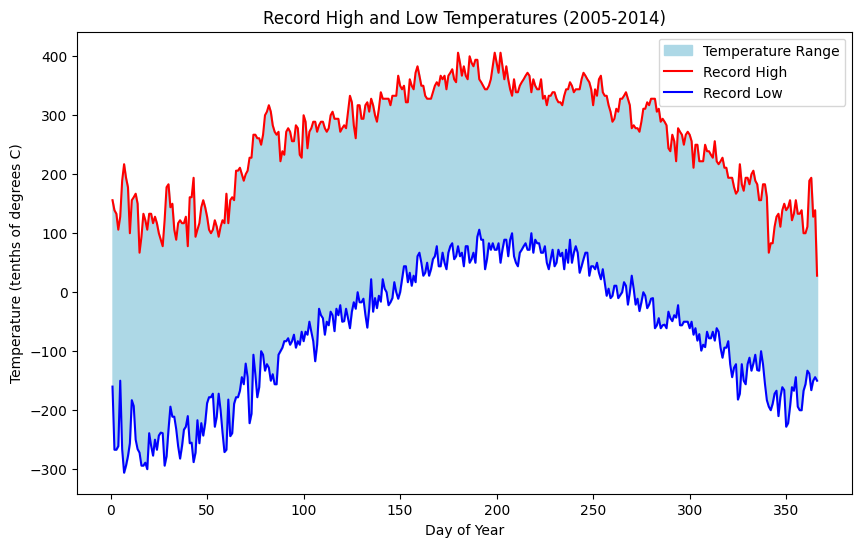

In [46]:
plt.figure(figsize=(10, 6))
plt.fill_between(record_highs.index, record_highs, record_lows, color='lightblue', label='Temperature Range')
plt.plot(record_highs.index, record_highs, color='red', label='Record High')
plt.plot(record_lows.index, record_lows, color='blue', label='Record Low')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures (2005-2014)')
plt.legend()
plt.show()

In [47]:
temp_2015_df = df_temp [df_temp ['Date'].dt.year == 2015].copy()
temp_2015_df ['day_of_year'] = temp_2015_df ['Date'].dt.dayofyear
broken_highs = temp_2015_df.loc[(temp_2015_df ['Element'] == 'TMAX') & (temp_2015_df ['Data_Value'] > record_highs.loc[temp_2015_df ['day_of_year']].values), :]
broken_lows = temp_2015_df.loc[(temp_2015_df ['Element'] == 'TMIN') & (temp_2015_df ['Data_Value'] < record_lows.loc[temp_2015_df ['day_of_year']].values), :]

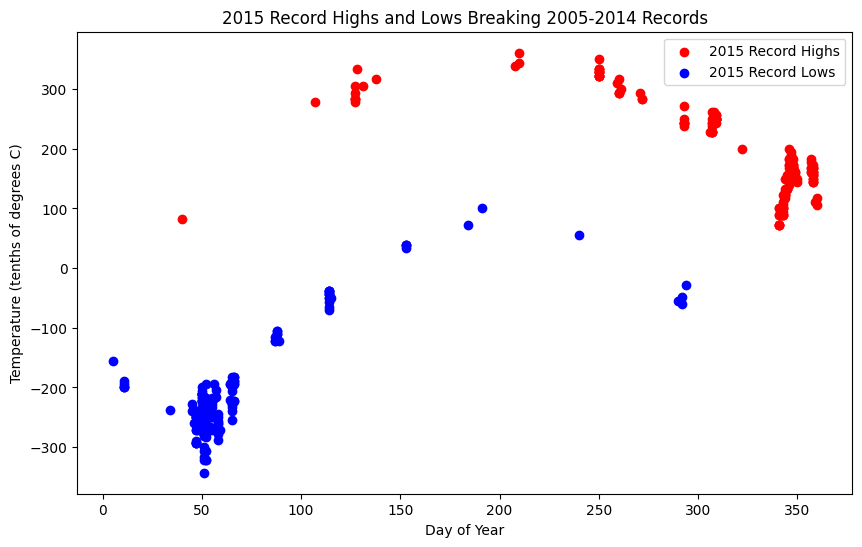

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(broken_highs['day_of_year'], broken_highs['Data_Value'], color='red', label='2015 Record Highs')
plt.scatter(broken_lows['day_of_year'], broken_lows['Data_Value'], color='blue', label='2015 Record Lows')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('2015 Record Highs and Lows Breaking 2005-2014 Records')
plt.legend()
plt.show()

In [49]:
filtered_temp_df = df_temp_filtered[~((df_temp_filtered['Date'].dt.month == 2) & (df_temp_filtered['Date'].dt.day == 29))]
filtered_temp_df

,ID,Date,Element,Data_Value,day_of_year
0,USW00094889,2014-11-12,TMAX,22,316
1,USC00208972,2009-04-29,TMIN,56,119
2,USC00200032,2008-05-26,TMAX,278,147
3,USC00205563,2005-11-11,TMAX,139,315
4,USC00200230,2014-02-27,TMAX,-106,58
...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,61
165081,USC00205822,2009-10-06,TMAX,167,279
165082,USC00205050,2014-07-14,TMAX,283,195
165083,USC00200230,2006-11-29,TMIN,117,333


In [50]:
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.743

In [51]:
stations_near_ann_arbor = df_bin_size[(df_bin_size['LATITUDE'].between(42.0, 42.6)) &
                                     (df_bin_size['LONGITUDE'].between(-84.0, -83.0))]

In [52]:
map_ann_arbor = folium.Map(location=[ann_arbor_lat, ann_arbor_lon], zoom_start=10)

In [53]:
for _, row in stations_near_ann_arbor.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=row['NAME']).add_to(map_ann_arbor)
map_ann_arbor.save("stations_near_ann_arbor.html")
map_ann_arbor


In [54]:
daily_max_2015 = temp_2015_df [temp_2015_df ['Element'] == 'TMAX'].groupby('Date')['Data_Value'].max()
daily_min_2015 = temp_2015_df [temp_2015_df ['Element'] == 'TMIN'].groupby('Date')['Data_Value'].min()

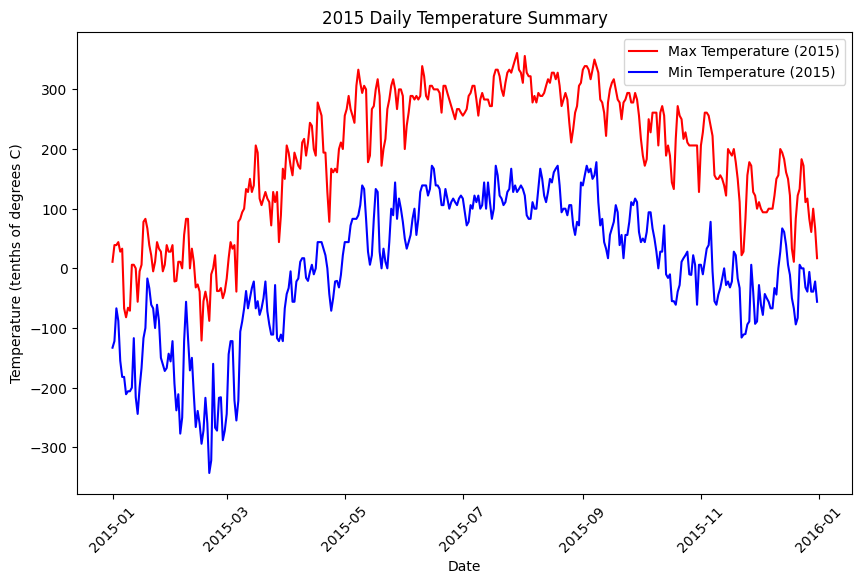

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(daily_max_2015.index, daily_max_2015, label='Max Temperature (2015)', color='red')
plt.plot(daily_min_2015.index, daily_min_2015, label='Min Temperature (2015)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('2015 Daily Temperature Summary')
plt.legend()
plt.xticks(rotation=45)
plt.show()